# Time Series to Supervised

## This tutorial is made to understand data preparation made to perform time-series forecasting with Deep Learning techniques. 

Time series data requires preparation before it can be used to train a supervised learning model, such as an LSTM neural network. For example, a univariate time series is represented as a vector of observations:

In [8]:
from numpy import array
series = array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])

A supervised learning algorithm requires that data is provided as a collection of samples, where each sample has an input component $(X)$ and an output component $(y)$.

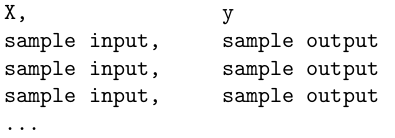

The model will learn how the mapping function $f$ for features $X$:

$$y = f (X)$$

A time series must be transformed into samples with input and output components. Thetransform both informs what the model will learn and how you intend to use the model in the future when making predictions, e.g. what is required to make a prediction $(X)$ and what prediction is made $(y)$. For a univariate time series problem where we are interested in one-step predictions, the observations at prior time steps, so-called lag observations, are used as input and the output is the observation at the current time step. For example, the above 10-step univariate series can be expressed as a supervised learning problem with three time steps for input and one step as output, as follows:

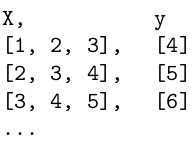

You can write code to perform this transform yourself and that is the general approach I teach and recommend for greater understanding of your data and control over the transformation process. The split sequence() function below implements this behavior and will split a given univariate sequence into multiple samples where each sample has a specified number of time steps and the output is a single time step.

In [7]:
# transform univariate time series to supervised learning problem
from numpy import array

# split a univariate sequence into samples
def split_sequence(sequence, n_steps):
    X, y = list(), list()
    
    for i in range(len(sequence)):
        
        # find the end of this pattern
        end_ix = i + n_steps
        
        # check if we are beyond the sequence
        if end_ix > len(sequence)-1:
            break
            
        # gather input and output parts of the pattern
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
        
    return array(X), array(y)

After you have transformed your data into a form suitable for training a supervised
learning model it will be represented as rows and columns. Each column will represent a feature
to the model and may correspond to a separate lag observation. Each row will represent a
sample and will correspond to a new example with input and output components. Let's transform the previously defined time series to the required data structure for our model:

In [9]:
# series original shape
print(series.shape)

(10,)


In [10]:
# transform data to a supervised learning problem
X, y = split_sequence(series, 3)
print(X.shape, y.shape)

(7, 3) (7,)


In [12]:
# show each sample
for i in range(len(X)):
    print(X[i], y[i])

[1 2 3] 4
[2 3 4] 5
[3 4 5] 6
[4 5 6] 7
[5 6 7] 8
[6 7 8] 9
[7 8 9] 10


## Data in this form can be used directly to train a simple neural network, such as a Multilayer Perceptron. The difficulty for beginners comes when trying to prepare this data for CNNs and LSTMs that require data to have a three-dimensional structure instead of the two-dimensional structure described so far.